<a href="https://colab.research.google.com/github/kavyau52/DFR/blob/main/dfd_test_meso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
import shutil
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [ ]:
# Height and width refer to the size of the image
# Channels refers to the amount of color channels (red, green, blue)

image_dimensions = {'height':256, 'width':256, 'channels':3}

In [ ]:
# Create a Classifier class

class Classifier:
    def __init__():
        self.model = 0

    def predict(self, x):
        return self.model.predict(x)

    def fit(self, x, y):
        return self.model.train_on_batch(x, y)

    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)

    def load(self, path):
        self.model.load_weights(path)





In [ ]:
# Create a MesoNet class using the Classifier

class Meso4(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(learning_rate = learning_rate)
        self.model.compile(optimizer = optimizer,
                           loss = 'mean_squared_error',
                           metrics = ['accuracy'])

    def init_model(self):
        x = Input(shape = (image_dimensions['height'],
                           image_dimensions['width'],
                           image_dimensions['channels']))

        x1 = Conv2D(8, (3, 3), padding='same', activation = 'relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)

        x2 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)

        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)

        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu', name='Conv_last')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)

        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)

        return Model(inputs = x, outputs = y)



In [ ]:
# Instantiate a MesoNet model with pretrained weights
meso = Meso4()
meso.load('Meso4_DF.h5')

In [ ]:
def unzip_folder(zip_file_path, extract_to_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_path)

In [ ]:
#zip_file_path = 'test_images/deepfake_database.zip'
#extract_to_path = 'test_images/deepfake_database'
#zip_file_path = 'test_images/test_images_celeb.zip'
#extract_to_path = 'test_images/test_images_celeb'
zip_file_path = 'test_images/deepfake_database.zip'
extract_to_path = 'test_images/deepfake_database'

if not os.path.exists(extract_to_path):
    os.makedirs(extract_to_path)
    unzip_folder(zip_file_path, extract_to_path)

In [ ]:
#unzip_folder(zip_file_path, extract_to_path)

In [ ]:
# Prepare image data

# Rescaling pixel values (between 1 and 255) to a range between 0 and 1
dataGenerator = ImageDataGenerator(rescale=1./255)

# Instantiating generator to feed images through the network


#data_dir = 'test_images/deepfake_database/deepfake_database/deepfake_database/train:test'
data_dir = 'test_images/deepfake_database/deepfake_database/deepfake_database/validation'
#data_dir = 'test_images/deepfake_database/deepfake_database/deepfake_database/celeb'
#data_dir = 'test_images/test_images_celeb'
checkpoint_dir = os.path.join(data_dir, '.ipynb_checkpoints')

if os.path.exists(checkpoint_dir):
    shutil.rmtree(checkpoint_dir)

generator = dataGenerator.flow_from_directory(
    #'test_images/deepfake_database/deepfake_database/deepfake_database/train:test',
    data_dir,
    # 'data',
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')

Found 7104 images belonging to 2 classes.


In [ ]:
# Checking class assignment
generator.class_indices

{'df': 0, 'real': 1}

1/1 [==============================] - 7s 7s/step
Predicted likelihood: 0.2098
Actual label: 0
1/1 [==============================] - 0s 20ms/step

Correct prediction: True


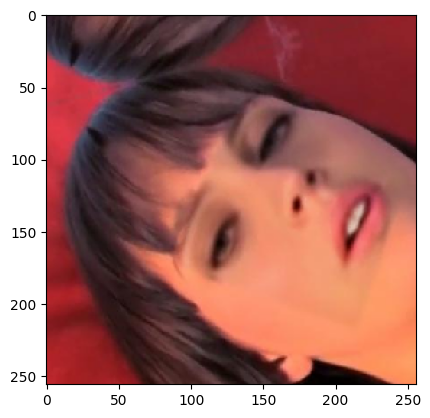

In [ ]:
# Rendering image X with label y for MesoNet
X, y = generator.next()



# Evaluating prediction
print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
#print(f"last layer: {meso.gc_test(X)}")
print(f"Actual label: {int(y[0])}")
print(f"\nCorrect prediction: {round(meso.predict(X)[0][0])==y[0]}")

# Showing image
plt.imshow(np.squeeze(X));



In [ ]:
'''
if os.path.exists(checkpoint_dir):
    shutil.rmtree(checkpoint_dir)

generator_test = dataGenerator.flow_from_directory(
    'test_images',
    # 'data',
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')
'''

"\nif os.path.exists(checkpoint_dir):\n    shutil.rmtree(checkpoint_dir)\n\ngenerator_test = dataGenerator.flow_from_directory(\n    'test_images',\n    # 'data',\n    target_size=(256, 256),\n    batch_size=1,\n    class_mode='binary')\n"

In [ ]:
'''
im=X[0].copy()



plt.imshow(im)
plt.show()
print(type(im))
print(im.shape)


res = cv2.resize(im, dsize=(224, 224))
plt.imshow(res)
plt.show()
print(type(res))
print(res.shape)

'''


'\nim=X[0].copy()\n\n\n\nplt.imshow(im)\nplt.show()\nprint(type(im))\nprint(im.shape)\n\n\nres = cv2.resize(im, dsize=(224, 224))\nplt.imshow(res)\nplt.show()\nprint(type(res))\nprint(res.shape)\n\n'

In [ ]:
# Creating separate lists for correctly classified and misclassified images
correct_real = []
correct_real_pred = []

correct_deepfake = []
correct_deepfake_pred = []

misclassified_real = []
misclassified_real_pred = []

misclassified_deepfake = []
misclassified_deepfake_pred = []

In [ ]:
# Generating predictions on validation set, storing in separate lists

for i in range(len(generator)):

    # Loading next picture, generating prediction
    X, y = generator.next()
    pred = meso.predict(X)[0][0]

    # Sorting into proper category
    if round(pred)==y[0] and y[0]==1:
        correct_real.append(X)
        correct_real_pred.append(pred)
    elif round(pred)==y[0] and y[0]==0:
        correct_deepfake.append(X)
        correct_deepfake_pred.append(pred)
    elif y[0]==1:
        misclassified_real.append(X)
        misclassified_real_pred.append(pred)
    else:
        misclassified_deepfake.append(X)
        misclassified_deepfake_pred.append(pred)

    # Printing status update
    if i % 1000 == 0:
        print(i, ' predictions completed.')

    if i == len(generator.labels)-1:
        print("All", len(generator.labels), "predictions completed")

    if len(correct_real) == 10:
      break

1/1 [==============================] - 0s 21ms/step
0  predictions completed.
1/1 [==============================] - 0s 20ms/step


In [ ]:
def plotter(images,preds):
    fig = plt.figure(figsize=(16,9))
    subset = np.random.randint(0, len(images)-1, 12)

    for i,j in enumerate(subset):
        fig.add_subplot(3,4,i+1)
        plt.imshow(np.squeeze(images[j]))
        plt.xlabel(f"Model confidence: \n{preds[j]:.4f}")
        plt.tight_layout()
        ax = plt.gca()
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])
    plt.show;

    return


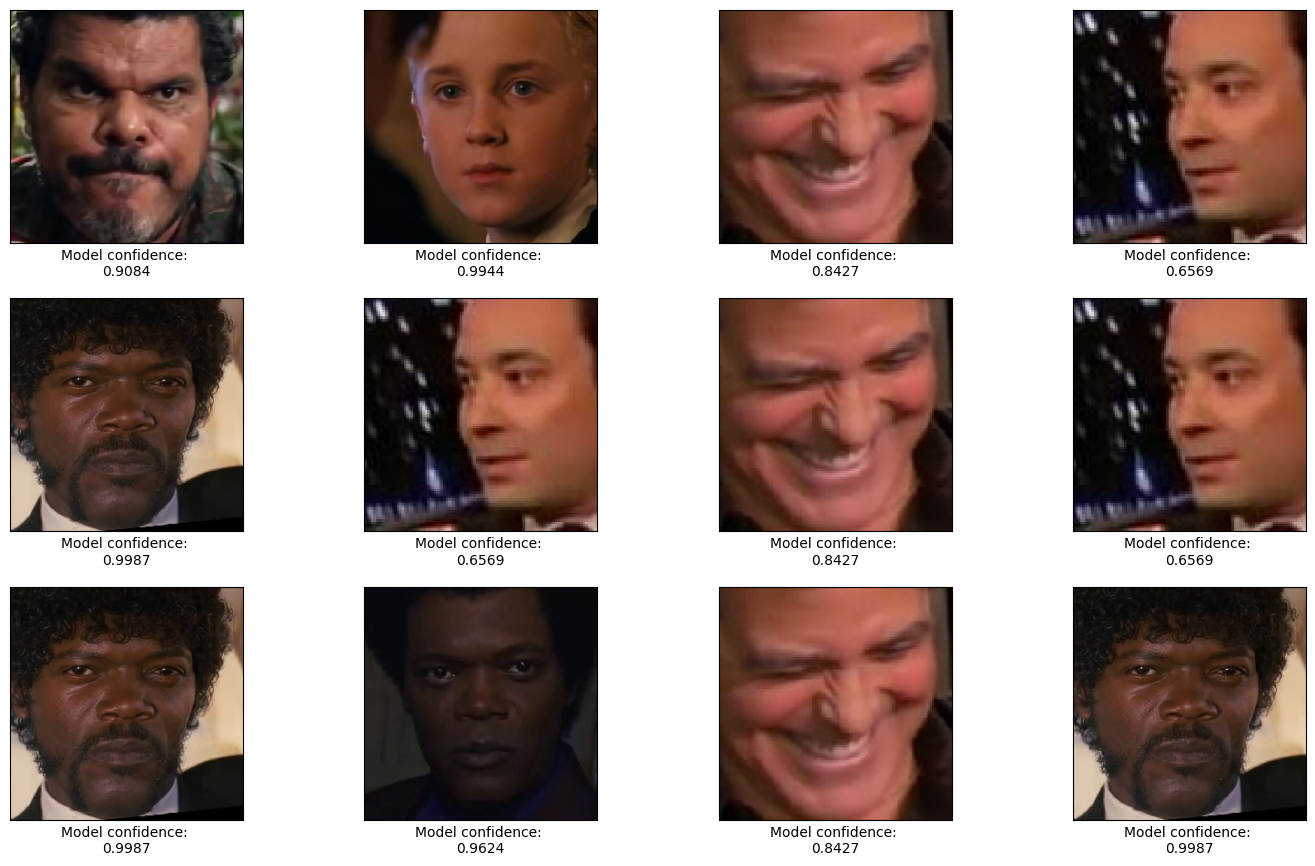

In [ ]:
plotter(correct_real, correct_real_pred)

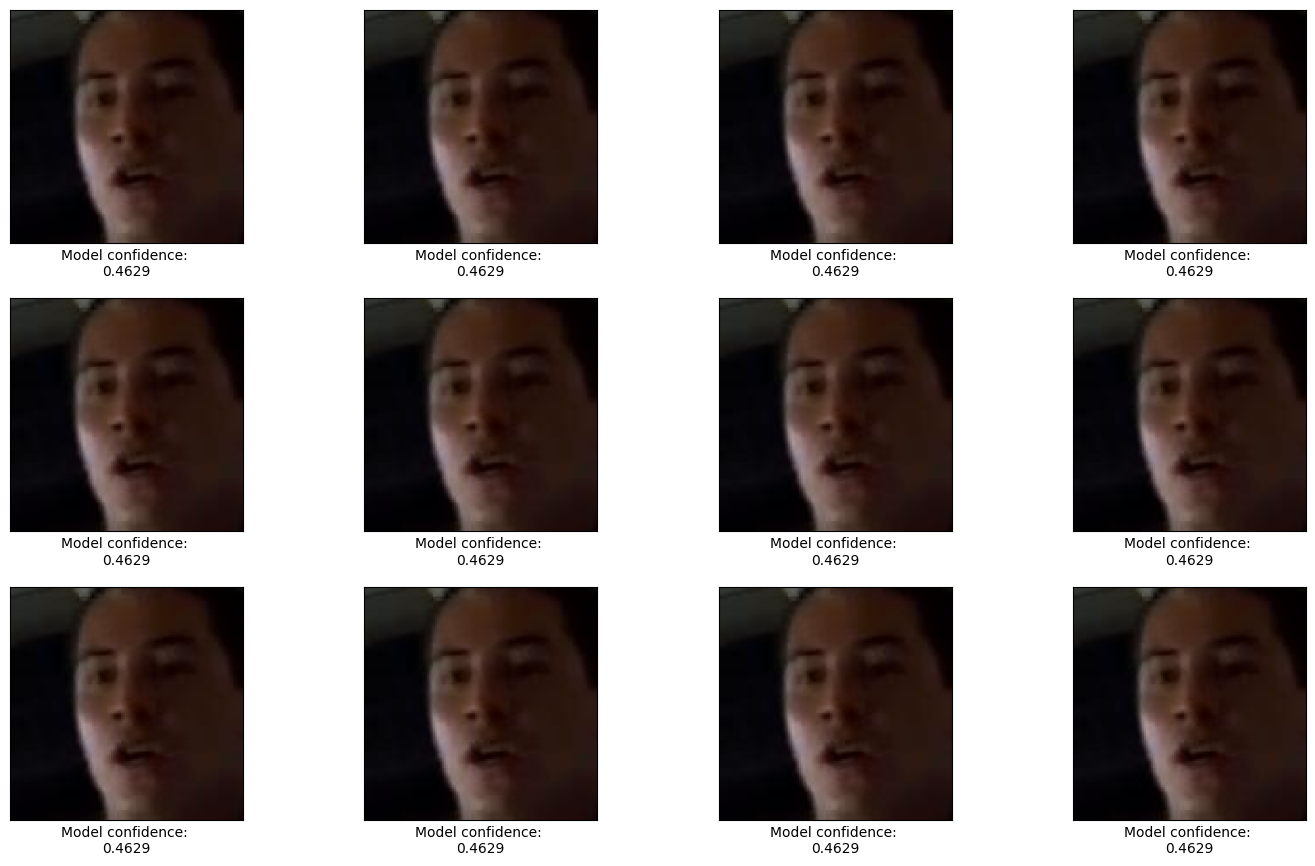

In [ ]:
plotter(misclassified_real, misclassified_real_pred)

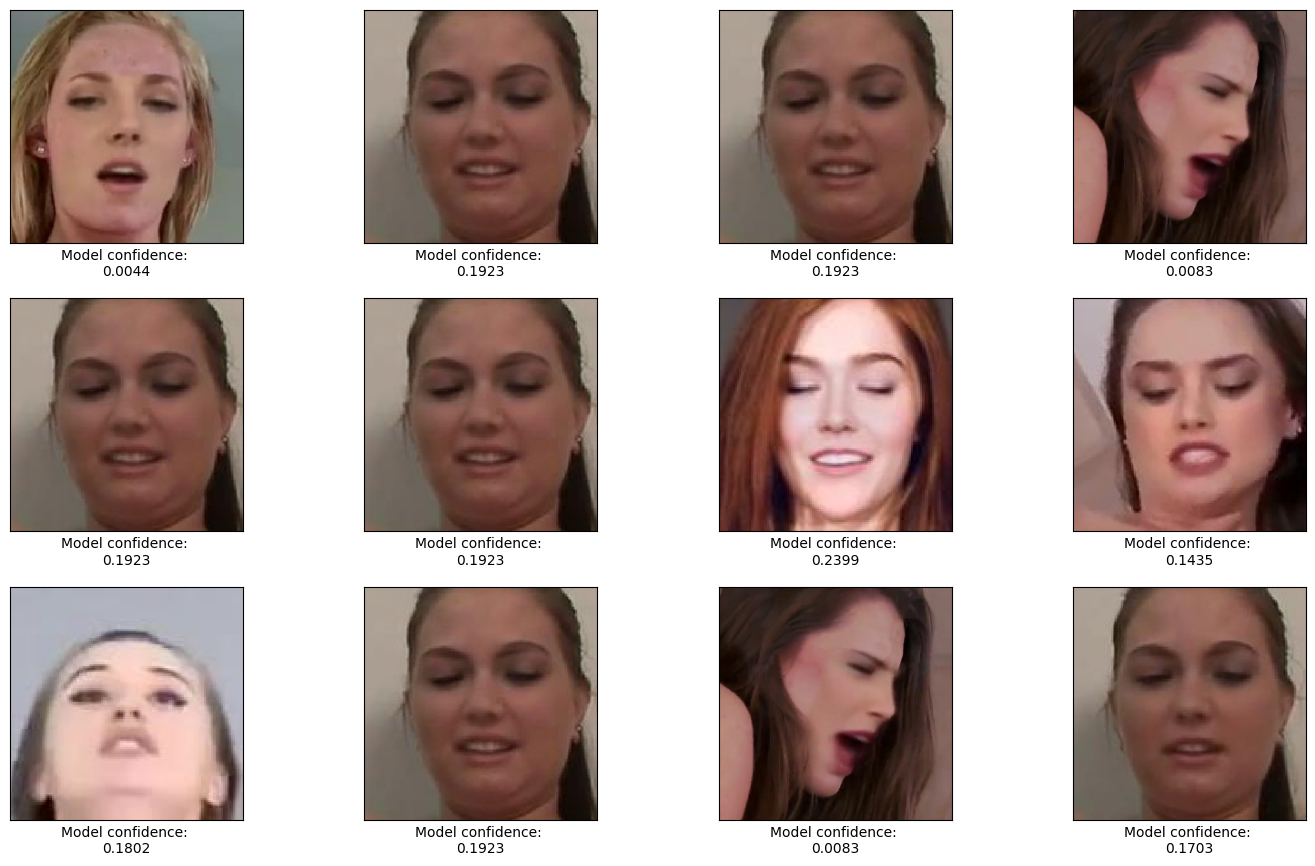

In [ ]:
plotter(correct_deepfake, correct_deepfake_pred)

In [ ]:
plotter(misclassified_deepfake, misclassified_deepfake_pred)

ValueError: ignored

<Figure size 1600x900 with 0 Axes>

# LIME

In [ ]:

import numpy as np
import keras
from keras.applications.imagenet_utils import decode_predictions
import skimage.io
import skimage.segmentation
import copy
import sklearn
import sklearn.metrics
from sklearn.linear_model import LinearRegression
import warnings

print('Notebook running: keras ', keras.__version__)
np.random.seed(222)

Notebook running: keras  2.14.0


In [ ]:
!pip install lime
import lime

from lime import lime_image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=d1ae5272ca18fb78097de098faa033de3c5172da1c2db4dbd3b3d90efd23aa57
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(correct_deepfake[4][0], meso.predict)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step


In [ ]:
from skimage.segmentation import mark_boundaries

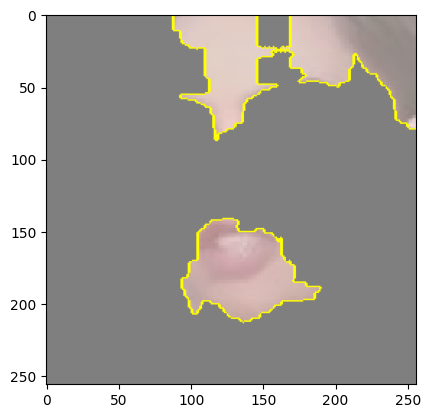

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
mask_t = mask
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

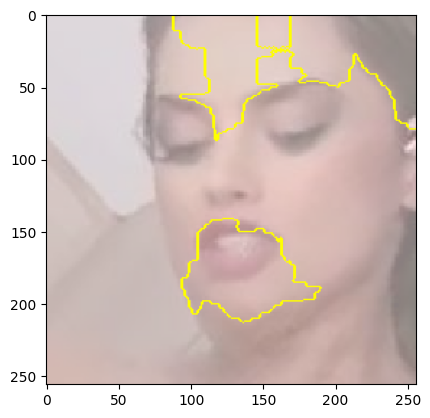

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

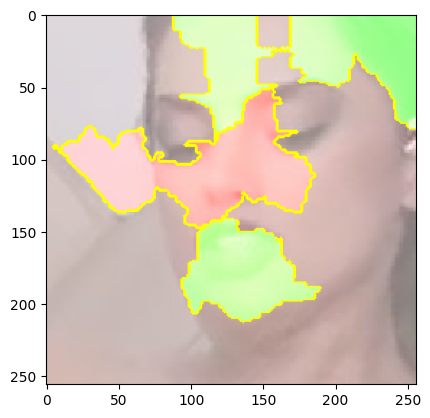

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

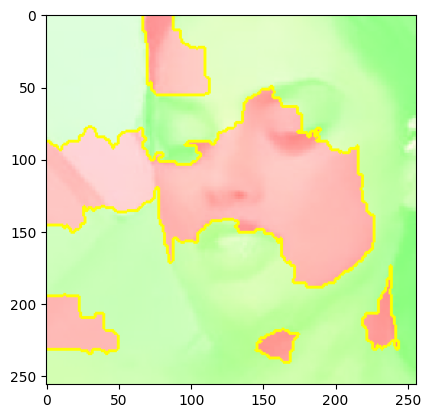

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.0001)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

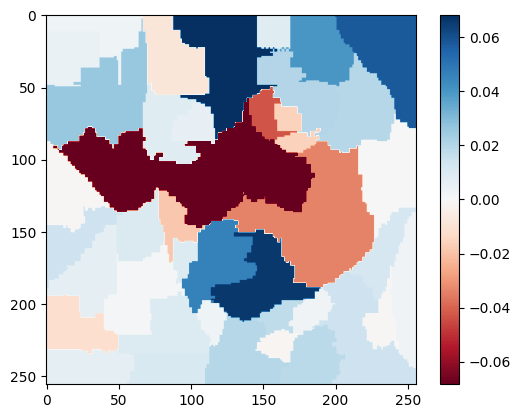

In [ ]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

In [ ]:
def plotter_n(temp_i, mask_i, n):
    fig = plt.figure(figsize=(16,9))
    subset = np.random.randint(0, 11, 12)

    for i in range(n):
        fig.add_subplot(3,4,i+1)
        plt.imshow(mark_boundaries(temp_i[i] / 2 + 0.5, mask_i[i]))

        plt.tight_layout()
        ax = plt.gca()
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])
    plt.show;

    return

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 29ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


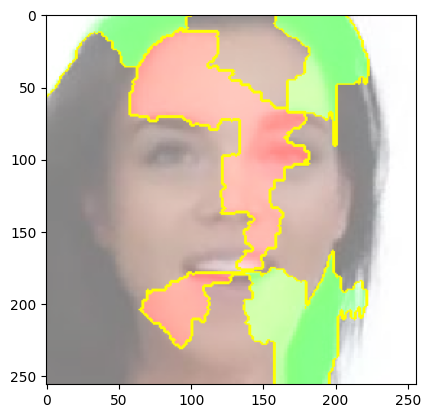

In [ ]:

temp_i=[]
mask_i=[]
for i in range(len(correct_deepfake)):
  img_r = correct_deepfake[i][0]
  explanation= explainer.explain_instance(img_r, meso.predict, top_labels=1)

  temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
  temp_i.append(temp)
  mask_i.append(mask)

for i in range(len(correct_deepfake)):
  plt.imshow(mark_boundaries(temp_i[i] / 2 + 0.5, mask_i[i]))


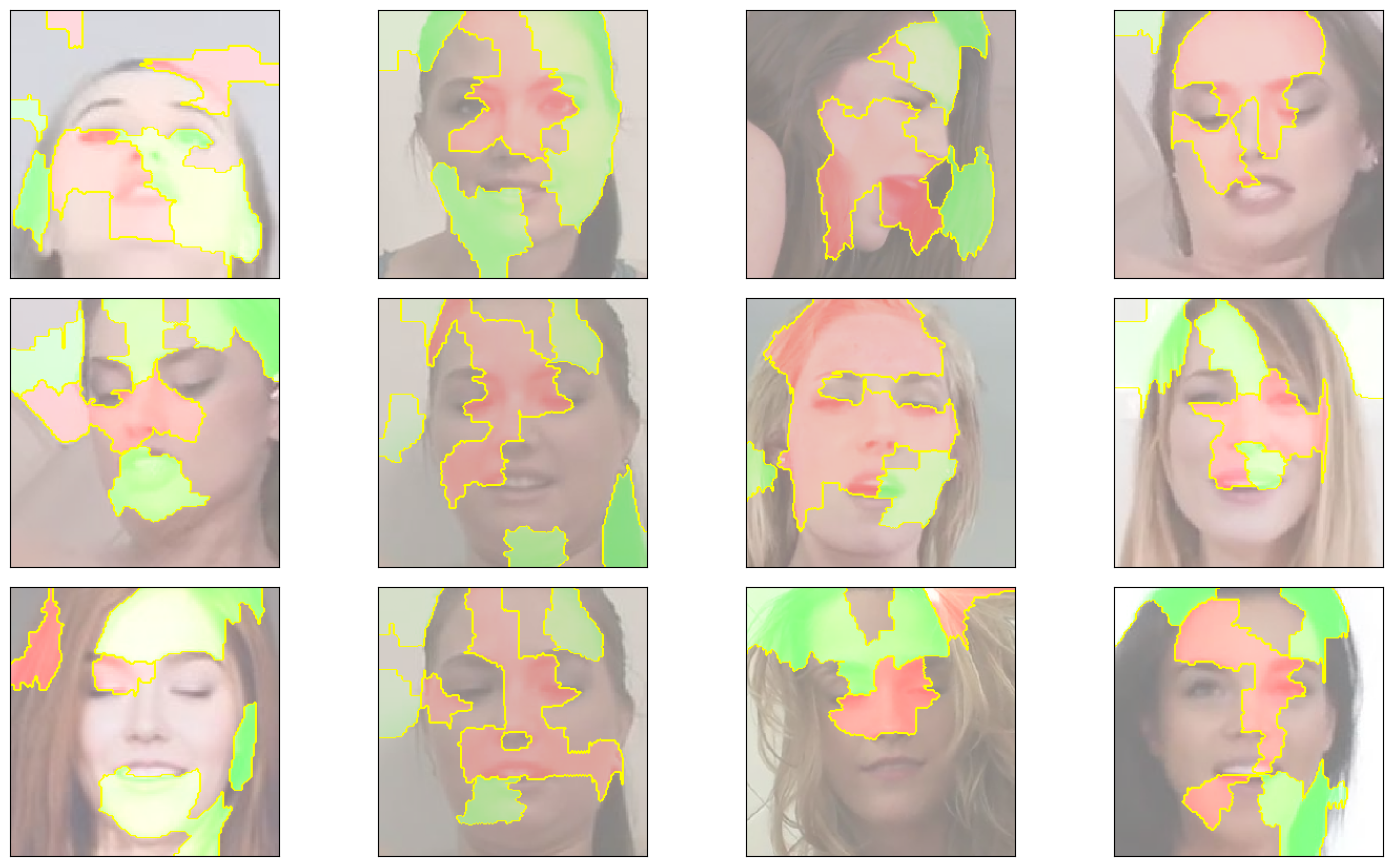

In [ ]:
plotter_n(temp_i,mask_i, len(correct_deepfake))

In [ ]:
import torch
perturbation_steps = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [ ]:
data = correct_deepfake[4][0]
vis =  tf.convert_to_tensor(mask_t)
base_size = 256 * 256
org_shape = data.shape

In [ ]:
for i in range(len(perturbation_steps)):
            #_data = data.clone()
            _data = data



            _, idx = torch.topk(vis, int(base_size * perturbation_steps[i]), dim=-1)

            idx = idx.unsqueeze(1).repeat(1, org_shape[1], 1)
            _data = _data.reshape(org_shape[0], org_shape[1], -1)
            _data = _data.scatter_(-1, idx, 0)
            _data = _data.reshape(*org_shape)

            _norm_data = normalize(_data)

            out = model(_norm_data)

            pred_probabilities = torch.softmax(out, dim=1)
            pred_prob = pred_probabilities.data.max(1, keepdim=True)[0].squeeze(1)
            diff = (pred_prob - pred_org_prob).data.cpu().numpy()
            prob_diff_pertub[i, perturb_index:perturb_index+len(diff)] = diff

            pred_logit = out.data.max(1, keepdim=True)[0].squeeze(1)
            diff = (pred_logit - pred_org_logit).data.cpu().numpy()
            logit_diff_pertub[i, perturb_index:perturb_index+len(diff)] = diff

            target_class = out.data.max(1, keepdim=True)[1].squeeze(1)
            temp = (target == target_class).type(target.type()).data.cpu().numpy()
            num_correct_pertub[i, perturb_index:perturb_index+len(temp)] = temp

            probs_pertub = torch.softmax(out, dim=1)
            target_probs = torch.gather(probs_pertub, 1, target[:, None])[:, 0]
            second_probs = probs_pertub.data.topk(2, dim=1)[0][:, 1]
            temp = torch.log(target_probs / second_probs).data.cpu().numpy()
            dissimilarity_pertub[i, perturb_index:perturb_index+len(temp)] = temp

model_index += len(target)
perturb_index += len(target)

TypeError: ignored

#Grad-Cam - Keras

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
# from tensorflow.keras.models import Model


# #def GradCam(model, img_array, layer_name, eps=1e-8):
# def GradCam(model, img_array, eps=1e-8):
#     '''
#     Creates a grad-cam heatmap given a model and a layer name contained with that model


#     Args:
#       model: tf model
#       img_array: (img_width x img_width) numpy array
#       layer_name: str


#     Returns
#       uint8 numpy array with shape (img_height, img_width)



#     gradModel = Model(
# 			inputs=[model.inputs],
# 			outputs=[model.get_layer(layer_name).output,
# 				model.output])
#     '''
#     with tf.GradientTape() as tape:
# 			# cast the image tensor to a float-32 data type, pass the
# 			# image through the gradient model, and grab the loss
# 			# associated with the specific class index
#       inputs = tf.cast(img_array, tf.float32)
#       #(convOutputs, predictions) = gradModel(inputs)
#       (convOutputs, predictions) = Model(
# 			inputs,
# 			outputs=[meso.gc_test(img_array),
# 				meso.predict(img_array)[0][0]])
#       loss = predictions[:, 0]
# 		# use automatic differentiation to compute the gradients
#     grads = tape.gradient(loss, convOutputs)

#     # compute the guided gradients
#     castConvOutputs = tf.cast(convOutputs > 0, "float32")
#     castGrads = tf.cast(grads > 0, "float32")
#     guidedGrads = castConvOutputs * castGrads * grads
# 		# the convolution and guided gradients have a batch dimension
# 		# (which we don't need) so let's grab the volume itself and
# 		# discard the batch
#     convOutputs = convOutputs[0]
#     guidedGrads = guidedGrads[0]
#     # compute the average of the gradient values, and using them
# 		# as weights, compute the ponderation of the filters with
# 		# respect to the weights
#     weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
#     cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

#     # grab the spatial dimensions of the input image and resize
# 		# the output class activation map to match the input image
# 		# dimensions
#     (w, h) = (img_array.shape[2], img_array.shape[1])
#     heatmap = cv2.resize(cam.numpy(), (w, h))
# 		# normalize the heatmap such that all values lie in the range
# 		# [0, 1], scale the resulting values to the range [0, 255],
# 		# and then convert to an unsigned 8-bit integer
#     numer = heatmap - np.min(heatmap)
#     denom = (heatmap.max() - heatmap.min()) + eps
#     heatmap = numer / denom
#     # heatmap = (heatmap * 255).astype("uint8")
# 		# return the resulting heatmap to the calling function
#     return heatmap


# def sigmoid(x, a, b, c):
#     return c / (1 + np.exp(-a * (x-b)))

# def superimpose(img_bgr, cam, thresh, emphasize=False):

#     '''
#     Superimposes a grad-cam heatmap onto an image for model interpretation and visualization.


#     Args:
#       image: (img_width x img_height x 3) numpy array
#       grad-cam heatmap: (img_width x img_width) numpy array
#       threshold: float
#       emphasize: boolean

#     Returns
#       uint8 numpy array with shape (img_height, img_width, 3)

#     '''
#     heatmap = cv2.resize(cam, (img_bgr.shape[1], img_bgr.shape[0]))
#     if emphasize:
#         heatmap = sigmoid(heatmap, 50, thresh, 1)
#     heatmap = np.uint8(255 * heatmap)
#     heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

#     hif = 0.8
#     superimposed_img = heatmap * hif + img_bgr
#     superimposed_img = np.minimum(superimposed_img, 255.0).astype(np.uint8)  # scale 0 to 255
#     superimposed_img_rgb = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)

#     return superimposed_img_rgb

In [ ]:
from tensorflow.keras import backend as K

def Grad_CAM(model, image, class_index, layer_name='Conv_last'):
    image_tensor = tf.convert_to_tensor(image[None, ...], dtype=tf.float32)

    target_layer = model.get_layer(name=layer_name)
    intermediate_model = tf.keras.models.Model(inputs=model.input, outputs=[target_layer.output, model.output])

    with tf.GradientTape(persistent=True) as tape:
        tape.watch(image_tensor)
        intermediate_output, model_out = intermediate_model(image_tensor)
        target_out = model_out[0][class_index]

    grads = tape.gradient(target_out, intermediate_output)  # grads:[1, 32, 32, 16]
    pooled_grads = tf.reduce_mean(grads, axis=(1, 2, 3))  # pooled_grads:[16]

    output_value = intermediate_output[-1].numpy()  # output_value:[32, 32, 16]
    pooled_grads_value = pooled_grads.numpy()  # pooled_grads_value: [16]

    for i in range(pooled_grads.shape[0]):
        output_value[:, :, i] *= pooled_grads_value[i]
    cam = np.mean(output_value, axis=-1)  # cam:[32, 32]

    (w, h) = (image_tensor.shape[2], image_tensor.shape[1])
    heatmap = cv2.resize(cam, (w, h))

    numer = heatmap - heatmap.min()
    denom = heatmap.max() - heatmap.min()
    heatmap = numer / denom

    # heatmap = np.maximum(heatmap, 0)
    # heatmap /= (np.max(heatmap) + 1e-12)

    return heatmap



In [ ]:
def sigmoid(x, a, b, c):
    return c / (1 + np.exp(-a * (x-b)))

def superimpose(original_image, heatmap, emphasize=False):
    if emphasize:
        heatmap = sigmoid(heatmap, 50, 0.5, 1)

    heatmap = cv2.applyColorMap(np.uint8(256 * heatmap), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 256
    vis = heatmap + np.float32(original_image)
    vis = vis / np.max(vis)
    vis = np.uint8(256 * vis)
    vis = cv2.cvtColor(np.array(vis), cv2.COLOR_RGB2BGR)
    return vis


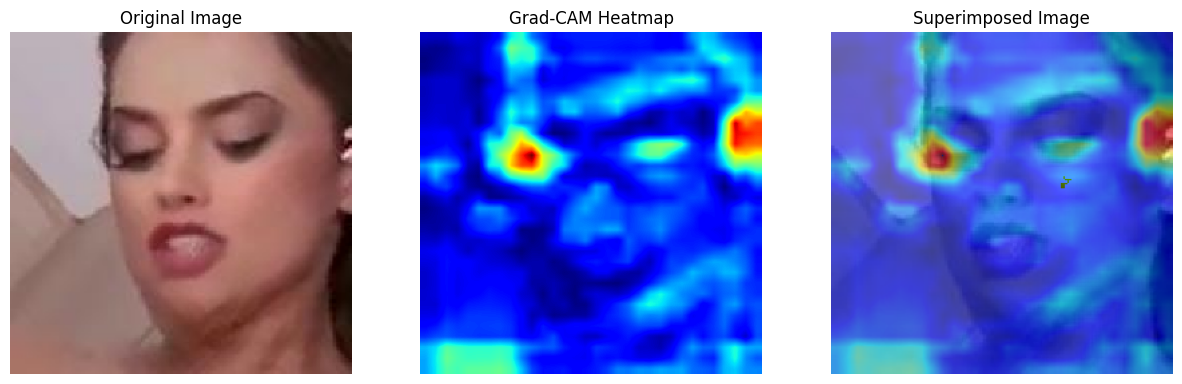

In [ ]:
## Grad-CAM heatmap for the last convolutional layer in the model, Conv_1

layer_name = 'Conv_last'
img_r = correct_deepfake[4][0]
class_idx = 0

grad_cam = Grad_CAM(meso.model, img_r, class_idx, layer_name)

# grad_cam_superimposed = superimpose(img_r, grad_cam, 0.5, True)

# plt.figure(figsize=(12, 5))
# ax = plt.subplot(1, 2, 1)
# plt.imshow(cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB))
# plt.axis('off')
# plt.title('Original Image')
# ax = plt.subplot(1, 2, 2)
# plt.imshow(grad_cam_superimposed)
# plt.axis('off')
# plt.title('Conv_1 Grad-CAM heat-map')
# plt.tight_layout()

grad_cam_superimposed = superimpose(img_r, grad_cam)
# grad_cam_superimposed = superimpose(img_r, grad_cam, True)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_r)
axs[0].axis('off')
axs[0].set_title('Original Image')

axs[1].imshow(grad_cam, cmap='jet')
axs[1].axis('off')
axs[1].set_title('Grad-CAM Heatmap')

axs[2].imshow(grad_cam_superimposed)
axs[2].axis('off')
axs[2].set_title('Superimposed Image')

plt.show()


In [ ]:
!pip install torchtext==0.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.1 MB/s eta 0:00:00
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.16.0
    Uninstalling torchtext-0.16.0:
      Successfully uninstalled torchtext-0.16.0


In [ ]:
import copy
import torch
from torch import nn
from torch import optim
import torchtext
from torchtext import data
from torchtext import datasets

TEXT = data.Field(sequential=True, batch_first=True, lower=True)
LABEL = data.LabelField()

# load data splits
train_data, val_data, test_data = datasets.SST.splits(TEXT, LABEL)

# build dictionary
TEXT.build_vocab(train_data)
LABEL.build_vocab(train_data)

# hyperparameters
vocab_size = len(TEXT.vocab)
label_size = len(LABEL.vocab)
padding_idx = TEXT.vocab.stoi['<pad>']
embedding_dim = 128
hidden_dim = 128

# build iterators
train_iter, val_iter, test_iter = data.BucketIterator.splits(
    (train_data, val_data, test_data),
    batch_size=32)

downloading trainDevTestTrees_PTB.zip


trainDevTestTrees_PTB.zip: 100%|██████████| 790k/790k [00:00<00:00, 1.46MB/s]


extracting


In [ ]:
for i in train_iter:
  print(i.text)

tensor([[ 2285,   108,     3,  ...,     1,     1,     1],
        [    5,  3219,  1207,  ...,     1,     1,     1],
        [   19,  1842, 13604,  ...,     1,     1,     1],
        ...,
        [    3,  1806,    48,  ...,     1,     1,     1],
        [ 3836,     6,    42,  ...,     1,     1,     1],
        [    5,    85,   329,  ...,   855,  1602,     2]])
tensor([[  19,    9,    5,  ...,    1,    1,    1],
        [  11,   10,   28,  ...,    1,    1,    1],
        [3337,    6, 5263,  ...,    1,    1,    1],
        ...,
        [  58,   14,    3,  ...,    1,    1,    1],
        [1141,   22,  155,  ...,    1,    1,    1],
        [ 651,   61,  341,  ...,    1,    1,    1]])
tensor([[   36,   135,  6829,  ...,     1,     1,     1],
        [   51,   594,   140,  ...,     1,     1,     1],
        [ 2606,   200,    24,  ..., 15387, 15495,     2],
        ...,
        [   13,     3,   740,  ...,  1614,   504,     2],
        [    5,   585,   342,  ...,     1,     1,     1],
        [